<a href="https://colab.research.google.com/github/sofezticated-gentleman/Docker-tuts/blob/main/Bengluru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
len(data["society"].unique())

2689

In [ ]:
data.drop("society", inplace=True, axis=1)

In [ ]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
from sklearn.impute import SimpleImputer
imp_bal=SimpleImputer(strategy="most_frequent")
imp_bal.fit(data["balcony"].values.reshape(-1,1))
data["balcony"]=imp_bal.fit_transform(data["balcony"].values.reshape(-1,1))

In [ ]:
data.isna().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imp_bal=SimpleImputer(strategy="most_frequent")
imp_bal.fit(data["location"].values.reshape(-1,1))
data["location"]=imp_bal.fit_transform(data["location"].values.reshape(-1,1))

In [ ]:
from sklearn.impute import SimpleImputer
imp_bal=SimpleImputer(strategy="mean")
imp_bal.fit(data["bath"].values.reshape(-1,1))
data["bath"]=imp_bal.fit_transform(data["bath"].values.reshape(-1,1))

In [ ]:
data.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.0,17.0


In [ ]:
from sklearn.impute import SimpleImputer
imp_bal=SimpleImputer(strategy="most_frequent", missing_values=np.nan)
imp_bal.fit(data["size"].values.reshape(-1,1))
data["size"]=imp_bal.fit_transform(data["size"].values.reshape(-1,1))

In [ ]:
content_list=[]
data["size"]=data["size"].astype(str)
for content in data["size"]:
  content_list.append(content.replace("Bedroom","BHK"))

data["size"]=content_list

In [ ]:
data["size"].unique()

array(['2 BHK', '4 BHK', '3 BHK', '6 BHK', '1 BHK', '1 RK', '8 BHK',
       '7 BHK', '5 BHK', '11 BHK', '9 BHK', '27 BHK', '10 BHK', '19 BHK',
       '16 BHK', '43 BHK', '14 BHK', '12 BHK', '13 BHK', '18 BHK'],
      dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [ ]:
data.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 BHK,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.0,17.0


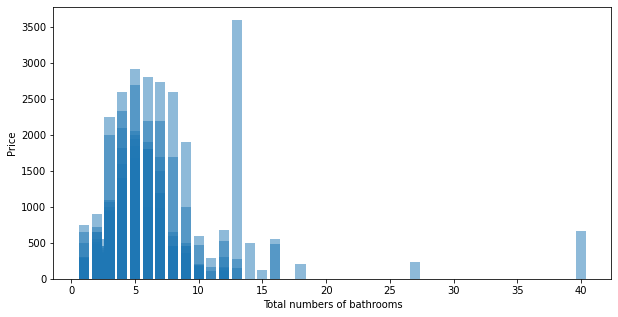

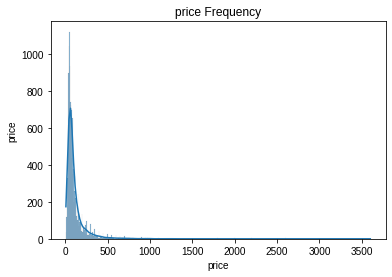

In [ ]:
dummies_area=pd.get_dummies(data["area_type"], drop_first=True)
dummies_avail=pd.get_dummies(data["availability"], drop_first=True)
dummies_loc=pd.get_dummies(data["location"], drop_first=True)
dummies_size=pd.get_dummies(data["size"], drop_first=True)
dummies_sqft=pd.get_dummies(data["total_sqft"], drop_first=True)

In [ ]:
content_list=[]
data["availability"]=data["availability"].astype(str)
for content in data["availability"]:
  if (content!= ("Ready to Move") or ( "Immediate Possession")):
    content_list.append(content[3:])

data["availability"]=content_list

In [ ]:
data["availability"].unique()

array(['Dec', 'dy To Move', 'May', 'Feb', 'Nov', 'Oct', 'Sep', 'Mar',
       'Apr', 'Aug', 'Jun', 'Jan', 'Jul', 'ediate Possession'],
      dtype=object)

In [ ]:
data=pd.concat([data, dummies_area, dummies_avail, dummies_loc, dummies_size], axis=1)
data.drop(["area_type", "availability", "location", "size", "total_sqft"], axis=1, inplace=True)

In [ ]:
data.skew()

bath             4.239327
balcony         -0.058782
price            8.064469
Carpet  Area    12.253319
Plot  Area       1.938532
                  ...    
5 BHK            5.869493
6 BHK            7.569760
7 BHK           11.412138
8 BHK           12.112089
9 BHK           15.611714
Length: 1409, dtype: float64

In [ ]:
X= data.drop(["price"], axis=1)
y=data["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaling=StandardScaler()
X_train_sca=scaling.fit_transform(X_train)
X_test_sca=scaling.fit_transform(X_test)

In [ ]:
data.head()

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_sca, y_train)
preds = reg.predict(X_test_sca)

In [ ]:
from sklearn.metrics import r2_score
(r2_score(preds, y_test))